# Testing LOSD
## Haushaltsäquivalenz-Einkommen steuerpflichtiger natürlicher Personen nach Haushaltstyp und Stadtquartier

Diese Daten beinhalten Quantilwerte des steuerbaren Einkommens natürlicher Personen, die in der Stadt Zürich primär steuerpflichtig sind.

Bitte beachten Sie für das korrekte Verständnis zu den Daten die unten aufgeführten weiteren Erläuterungen in der Rubrik «Bemerkungen».

https://data.integ.stadt-zuerich.ch/dataset/wir100od100a

Datum: 24.05.2024

### Colab
Mit Colab kann das Jupyter-Notebook interaktiv im Browser gestartet werden. 

Klicke auf den Button:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/DonGoginho/colab/blob/main/losd/3240_losd_bev_bestand_jahr_quartier_od3240.ipynb)


### Importiere die notwendigen Packages

In [1]:
#%pip install altair datetime folium geopandas io requests matplotlib numpy pandas seaborn plotly
!pip install altair==5.0.1 vl-convert-python

In [2]:
import altair as alt
import datetime
import folium 
import geopandas as gpd
import io
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pivottablejs
#from pivottablejs import pivot_ui
import plotly.express as px
import requests
import seaborn as sns

Importiere die eigenen Funktionen, die unter ../0_scripts abegelegt sind:

1) Klone das Github-Repo auf Colab. Sonst werden die Skripts nicht gelesen...

In [ ]:
!git clone https://github.com/DonGoginho/colab.git


fatal: destination path 'colab' already exists and is not an empty directory.


2) Checke die Schreibrechte in den geklonten Verzeichnissen

In [ ]:
!ls -l /content/colab
!ls -l /content/colab/losd


total 20
drwxr-xr-x 4 root root 4096 Jul  3 12:58 0_scripts
drwxr-xr-x 2 root root 4096 Jul  3 12:58 archiv
-rw-r--r-- 1 root root 1211 Jul  3 12:58 LICENSE
drwxr-xr-x 5 root root 4096 Jul  3 12:58 losd
-rw-r--r-- 1 root root 1755 Jul  3 12:58 README.md
total 4484
-rw-r--r-- 1 root root  216728 Jul  3 12:58 bev3160_losd_bev_bestand_jahr_konfession_od3160.ipynb
-rw-r--r-- 1 root root 1755589 Jul  3 12:58 bev3240_losd_bev_bestand_jahr_quartier_od3240.ipynb
-rw-r--r-- 1 root root  696643 Jul  3 12:58 bev3241_losd_bev_bestand_jahr_statzonen_od3241.ipynb
-rw-r--r-- 1 root root 1152082 Jul  3 12:58 bev3242_losd_bev_bestand_jahr_kreis_od3242.ipynb
-rw-r--r-- 1 root root  285094 Jul  3 12:58 bev3243_losd_bev_bestand_jahr_od3243.ipynb
-rw-r--r-- 1 root root  461744 Jul  3 12:58 colab_bev3243_losd_bev_bestand_jahr_od3243.ipynb
drwxr-xr-x 2 root root    4096 Jul  3 12:59 grafiken_testing
drwxr-xr-x 2 root root    4096 Jul  3 12:58 org_ipynb
drwxr-xr-x 2 root root    4096 Jul  3 12:58 saved_data


3) Importiere die Skripts

In [ ]:
import sys
sys.path.append('/content/colab/0_scripts')

import my_py_dataviz_functions as mypy_dv
import my_py_dataloading_functions as mypy_dl

In [4]:
SSL_VERIFY = False
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.gemeinderat-zuerich.ch nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False

In [5]:
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()

### Settings
Definiere Settings. 
Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen)

In [6]:
#pd.options.display.float_format = lambda x : '{:,.1f}'.format(x) if (np.isnan(x) | np.isinf(x)) else '{:,.0f}'.format(x) if int(x) == x else '{:,.1f}'.format(x)
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

#### Zeitvariabeln

In [7]:
#Zeitvariabeln als Strings:
now = datetime.date.today()
year_today = now.strftime("%Y")
date_today = "_"+now.strftime("%Y-%m-%d")

#Zeitvariabeln als Integers:
int_times = now.timetuple()
aktuellesJahr = int_times[0]
aktuellerMonat = int_times[1]
selectedMonat = int_times[1]-2
#print(aktuellesJahr, aktuellerMonat,'datenstand: ', selectedMonat, int_times)

### Daten importieren und Metadaten checken

- status: int / prod
- data_source: web / ld / dropzone
- datums_attr: beschreibt das oder die Datumsfelder, die als Datum geparsed werden sollen. Falls es keines gibt: None

In [8]:
#speichere die variable global, damit ich sie später verwenden kann, wenn ich grafiken mit diesem namen speichere.
package_name = "wir100od100a"

In [9]:
data2betested = mypy_dl.load_data(
    status = 'int'
    , data_source = 'ld'
    , package_name = package_name
    , dataset_name = "wir100od100a"    
    , datums_attr = ['ZEIT_LANG']
    )

fp lautet:https://ld.integ.stadt-zuerich.ch/statistics/view/WIR100OD100A/observation?format=csv


 **Überprüfe die Metadaten:**

 **Dataset auf INTEG-Datakatalog:** Link https://data.integ.stadt-zuerich.ch/dataset/wir100od100a 

 **View auf INTEG-LD:** Link https://ld.integ.stadt-zuerich.ch/statistics/view/WIR100OD100A 

In [ ]:
data2betested.sort_values('HAE_GGH1400_STK1075', ascending=True)

AttributeError: 'NoneType' object has no attribute 'sort_values'

In [ ]:
data2betested['HAE_GGH1400_STK1075'] = pd.to_numeric(data2betested['HAE_GGH1400_STK1075'], errors='coerce')

data2betested.dtypes

ZEIT_LANG              datetime64[ns]
ZEIT_CODE                      object
RAUM_LANG                      object
RAUM_CODE                      object
HTY_LANG                       object
HTY_CODE                       object
HAE_GGH1400_STK1025            object
HAE_GGH1400_STK1050            object
HAE_GGH1400_STK1075           float64
dtype: object

Berechne weitere Attribute falls notwendig

In [ ]:
data2betested = (
    data2betested
    .copy()
    .assign(
        #Aktualisierungs_Datum_str= lambda x: x.Aktualisierungs_Datum.astype(str),
        StichtagDatJahr = lambda x: x.ZEIT_LANG,
        StichtagDatJahr_str = lambda x: x.ZEIT_LANG.astype(str),
        Jahr = lambda x: x.ZEIT_LANG.dt.year,
        #Jahr_nbr = lambda x: x.ZEIT_CODE.str[-4:].astype(int),    
        RAUM_my_sort = lambda x: x.RAUM_CODE.str[-3:].astype(int),

    )
    .sort_values('ZEIT_LANG', ascending=False)
    )
data2betested.head(2).T

,1041,519
ZEIT_LANG,2021-12-31 00:00:00,2021-12-31 00:00:00
ZEIT_CODE,Z31122021,Z31122021
RAUM_LANG,Fluntern,Affoltern
RAUM_CODE,R00071,R00111
HTY_LANG,Generationenhaushalt,Ehepaar ohne Kinder
HTY_CODE,HTY0014,HTY0005
HAE_GGH1400_STK1025,…,51.8
HAE_GGH1400_STK1050,…,37.33
HAE_GGH1400_STK1075,NaN,71
StichtagDatJahr,2021-12-31 00:00:00,2021-12-31 00:00:00


Zeitbereich aus den Daten:

In [ ]:
data_max_date = str(max(data2betested.ZEIT_LANG).year)
data_min_date = str(min(data2betested.ZEIT_LANG).year)

print(f"Die Daten haben ein Minimumjahr von {data_min_date} und ein Maximumjahr von {data_max_date}")


Die Daten haben ein Minimumjahr von 2013 und ein Maximumjahr von 2021


Temp speichere die csv-Datei, da es immer wieder zu Ausfällen kommt. So kann ich mal den Report fertig bauen.

In [ ]:
docname = package_name +date_today+".csv"
print(docname)

wir100od100a_2024-06-19.csv


In [ ]:
data2betested.to_csv('/content/colab/losd/saved_data/'+docname, index=False)

### Einfache Datentests

In [ ]:
data2betested.head(2).T

,1041,519
ZEIT_LANG,2021-12-31 00:00:00,2021-12-31 00:00:00
ZEIT_CODE,Z31122021,Z31122021
RAUM_LANG,Fluntern,Affoltern
RAUM_CODE,R00071,R00111
HTY_LANG,Generationenhaushalt,Ehepaar ohne Kinder
HTY_CODE,HTY0014,HTY0005
HAE_GGH1400_STK1025,…,51.8
HAE_GGH1400_STK1050,…,37.33
HAE_GGH1400_STK1075,NaN,71
StichtagDatJahr,2021-12-31 00:00:00,2021-12-31 00:00:00


In [ ]:
data2betested.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3443 entries, 1041 to 1075
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ZEIT_LANG            3443 non-null   datetime64[ns]
 1   ZEIT_CODE            3443 non-null   object        
 2   RAUM_LANG            3443 non-null   object        
 3   RAUM_CODE            3443 non-null   object        
 4   HTY_LANG             3443 non-null   object        
 5   HTY_CODE             3443 non-null   object        
 6   HAE_GGH1400_STK1025  3443 non-null   object        
 7   HAE_GGH1400_STK1050  3443 non-null   object        
 8   HAE_GGH1400_STK1075  2416 non-null   float64       
 9   StichtagDatJahr      3443 non-null   datetime64[ns]
 10  StichtagDatJahr_str  3443 non-null   object        
 11  Jahr                 3443 non-null   int32         
 12  RAUM_my_sort         3443 non-null   int32         
dtypes: datetime64[ns](2), float64(1), i

In [ ]:
print(f'The dataset has {data2betested.shape[0]:,.0f} rows (observations) and {data2betested.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {data2betested.duplicated().sum()} exact duplicates in the data.')

The dataset has 3,443 rows (observations) and 13 columns (variables).
There seem to be 0 exact duplicates in the data.


Welches sind die Quartiere ohne Werte bei der Kennzahl?

In [ ]:
data2betested[np.isnan(data2betested.HAE_GGH1400_STK1075)]

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,HTY_LANG,HTY_CODE,HAE_GGH1400_STK1025,HAE_GGH1400_STK1050,HAE_GGH1400_STK1075,StichtagDatJahr,StichtagDatJahr_str,Jahr,RAUM_my_sort
1041,2021-12-31,Z31122021,Fluntern,R00071,Generationenhaushalt,HTY0014,…,…,NaN,2021-12-31,2021-12-31,2021,71
3119,2021-12-31,Z31122021,Enge,R00024,Patchwork-Haushalt,HTY0011,…,…,NaN,2021-12-31,2021-12-31,2021,24
3113,2021-12-31,Z31122021,Escher Wyss,R00052,Generationenhaushalt,HTY0014,…,…,NaN,2021-12-31,2021-12-31,2021,52
2453,2021-12-31,Z31122021,Wollishofen,R00021,Eingetragenes Paar mit Kind(ern),HTY0009,…,…,NaN,2021-12-31,2021-12-31,2021,21
2461,2021-12-31,Z31122021,Weinegg,R00083,Generationenhaushalt,HTY0014,…,…,NaN,2021-12-31,2021-12-31,2021,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2786,2013-12-31,Z31122013,Seefeld,R00081,Generationenhaushalt,HTY0014,…,…,NaN,2013-12-31,2013-12-31,2013,81
2788,2013-12-31,Z31122013,Wollishofen,R00021,Eingetragenes Paar ohne Kinder,HTY0006,…,…,NaN,2013-12-31,2013-12-31,2013,21
1003,2013-12-31,Z31122013,Hottingen,R00072,Eingetragenes Paar ohne Kinder,HTY0006,…,…,NaN,2013-12-31,2013-12-31,2013,72
1000,2013-12-31,Z31122013,Hirzenbach,R00123,Eingetragenes Paar ohne Kinder,HTY0006,…,…,NaN,2013-12-31,2013-12-31,2013,123


### Verwende das Datum als Index

While we did already parse the `datetime` column into the respective datetime type, it currently is just a regular column. 
**To enable quick and convenient queries and aggregations, we need to turn it into the index of the DataFrame**

In [ ]:
data2betested = data2betested.set_index("StichtagDatJahr") 
data2betested = data2betested.sort_index()

In [ ]:
data2betested.index.year.unique()

Index([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype='int32', name='StichtagDatJahr')

### Beschreibe einzelne Attribute

Beschreibe nicht numerische Attribute

In [ ]:
# describe non-numerical features
try:
    with pd.option_context('display.float_format', '{:,.2f}'.format):
        display(data2betested.describe(exclude='number',datetime_is_numeric=True))
except:
    print("No categorical data in dataset.")

No categorical data in dataset.


Beschreibe numerische Attribute

In [ ]:
# describe numerical features
try:
    with pd.option_context('display.float_format', '{:,.0f}'.format):
        display(data2betested.describe(include='number'))
except:
    print("No numercial data in dataset.")

,HAE_GGH1400_STK1075,Jahr,RAUM_my_sort
count,"2,416","3,443","3,443"
mean,88,"2,017",65
std,30,3,36
min,37,"2,013",11
25%,65,"2,015",33
50%,84,"2,017",71
75%,106,"2,019",92
max,206,"2,021",123


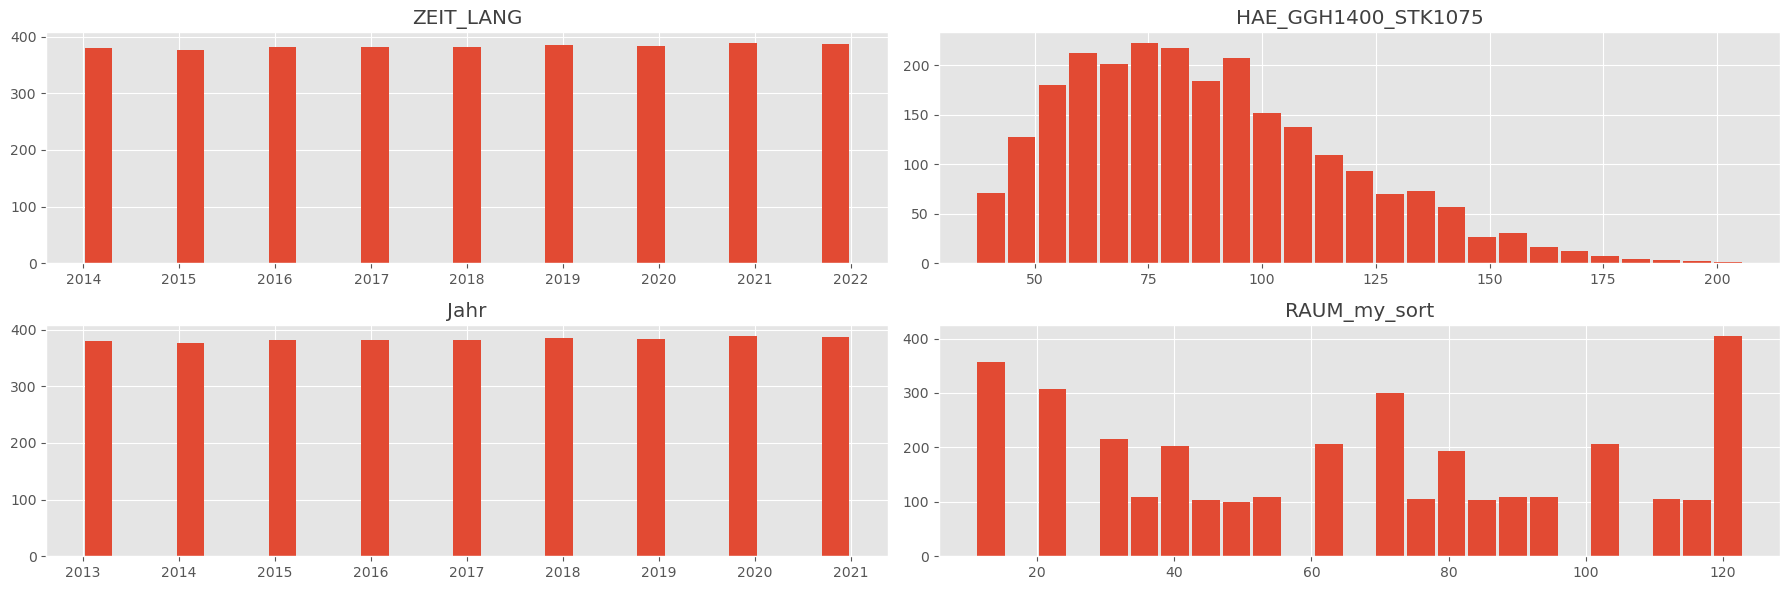

In [ ]:
plt.style.use('ggplot')
params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }
plt.rcParams.update(params)

try:
    data2betested.hist(bins=25, rwidth=0.9)
    plt.tight_layout()
    plt.show()
except:
    print("No numercial data to plot.") 

### Gibt es Duplikate?

In [ ]:
# find duplicate rows
duplicate_rows = data2betested[data2betested.duplicated()]
duplicate_rows

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,HTY_LANG,HTY_CODE,HAE_GGH1400_STK1025,HAE_GGH1400_STK1050,HAE_GGH1400_STK1075,StichtagDatJahr_str,Jahr,RAUM_my_sort
StichtagDatJahr,,,,,,,,,,,,


### Nullwerte und Missings?

In [ ]:
data2betested.isnull().sum()

ZEIT_LANG                 0
ZEIT_CODE                 0
RAUM_LANG                 0
RAUM_CODE                 0
HTY_LANG                  0
HTY_CODE                  0
HAE_GGH1400_STK1025       0
HAE_GGH1400_STK1050       0
HAE_GGH1400_STK1075    1027
StichtagDatJahr_str       0
Jahr                      0
RAUM_my_sort              0
dtype: int64

In [ ]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
#import missingno as msno
#msno.matrix(data2betested, labels=True, sort='descending');
#msno.heatmap(data2betested)

### Gruppierungen

In [ ]:
agg_jahr = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr']) \
    .agg(med_HAE75=('HAE_GGH1400_STK1075', 'median')) \
    .sort_values('Jahr', ascending=False) 
agg_jahr.reset_index().head(3)

,Jahr,med_HAE75
0,2021,87
1,2020,86
2,2019,87


In [ ]:
agg_Quarts = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['RAUM_my_sort', 'RAUM_LANG', 'RAUM_CODE']) \
    .agg(med_HAE75=('HAE_GGH1400_STK1075', 'median')) \
    .sort_values('RAUM_CODE', ascending=False) 
agg_Quarts.reset_index().head(50)

,RAUM_my_sort,RAUM_LANG,RAUM_CODE,med_HAE75
0,123,Hirzenbach,R00123,55
1,122,Schwamendingen-Mitte,R00122,56
2,121,Saatlen,R00121,58
3,119,Seebach,R00119,67
4,115,Oerlikon,R00115,81
5,111,Affoltern,R00111,62
6,102,Wipkingen,R00102,78
7,101,Höngg,R00101,82
8,92,Altstetten,R00092,66
9,91,Albisrieden,R00091,72


In [ ]:
agg_HTY = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['HTY_LANG', 'HTY_CODE']) \
    .agg(med_HAE75=('HAE_GGH1400_STK1075', 'median')) \
    .sort_values('HTY_CODE', ascending=True) 
agg_HTY.reset_index().head(50)

,HTY_LANG,HTY_CODE,med_HAE75
0,Einpersonenhaushalt,HTY0001,81
1,Zweipersonenhaushalt,HTY0004,102
2,Ehepaar ohne Kinder,HTY0005,97
3,Eingetragenes Paar ohne Kinder,HTY0006,103
4,Ein-Elternhaushalt,HTY0007,53
5,Ehepaar mit Kind(ern),HTY0008,73
6,Eingetragenes Paar mit Kind(ern),HTY0009,NaN
7,Paar mit Kind(ern),HTY0010,74
8,Patchwork-Haushalt,HTY0011,63
9,Wohngemeinschaft ohne Kinder,HTY0012,95


### Zeitpunkte und Zeiträume abfragen

A particular powerful feature of the Pandas DataFrame is its indexing capability that also works using time-based entities, such as dates and times. We have already created the index above, so let's put it to use.

In [ ]:
data2betested.loc[data_max_date].head(2)
#data2betested.loc["2021-10-31":"2021-11-30"].head(2)

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,HTY_LANG,HTY_CODE,HAE_GGH1400_STK1025,HAE_GGH1400_STK1050,HAE_GGH1400_STK1075,StichtagDatJahr_str,Jahr,RAUM_my_sort
StichtagDatJahr,,,,,,,,,,,,
2021-12-31,2021-12-31,Z31122021,Oerlikon,R00115,Einpersonenhaushalt,HTY0001,55.0,31.25,81,2021-12-31,2021,115
2021-12-31,2021-12-31,Z31122021,Oberstrass,R00063,Ehepaar ohne Kinder,HTY0005,92.9,59.13,142,2021-12-31,2021,63


### Visualisierungen nach Zeitausschnitten

#### Entwicklung HH-Äquivalenzeinkommen

In [ ]:
data2betested.columns

Index(['ZEIT_LANG', 'ZEIT_CODE', 'RAUM_LANG', 'RAUM_CODE', 'HTY_LANG', 'HTY_CODE',
       'HAE_GGH1400_STK1025', 'HAE_GGH1400_STK1050', 'HAE_GGH1400_STK1075', 'StichtagDatJahr_str',
       'Jahr', 'RAUM_my_sort'],
      dtype='object')

In [ ]:
myAgg3 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['ZEIT_LANG', 'ZEIT_CODE', 'HTY_LANG', 'HTY_CODE','StichtagDatJahr_str', 'Jahr']) \
    .agg(med_HAE75=('HAE_GGH1400_STK1075', 'mean')) \
    .sort_values('HTY_CODE', ascending=True) 

myAgg3.reset_index().tail(6)

,ZEIT_LANG,ZEIT_CODE,HTY_LANG,HTY_CODE,StichtagDatJahr_str,Jahr,med_HAE75
104,2021-12-31,Z31122021,Generationenhaushalt,HTY0014,2021-12-31,2021,NaN
105,2018-12-31,Z31122018,Generationenhaushalt,HTY0014,2018-12-31,2018,NaN
106,2017-12-31,Z31122017,Generationenhaushalt,HTY0014,2017-12-31,2017,NaN
107,2019-12-31,Z31122019,Generationenhaushalt,HTY0014,2019-12-31,2019,NaN
108,2013-12-31,Z31122013,Familien-Verbund,HTY0015,2013-12-31,2013,NaN
109,2016-12-31,Z31122016,Familien-Verbund,HTY0015,2016-12-31,2016,NaN


In [ ]:
grafik3 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg3.reset_index()
    , x = 'ZEIT_LANG:T'
    , y = 'med_HAE75:Q'
    , myTitle = "Entwicklung der Haushaltsäquivalenzeinkommen (p50) nach Haushaltstyp, seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Anz. Personen'
    , warning_status  = "ignore"
    , category='HTY_LANG'
    , category_beschriftung='Haushaltstypen'
)
grafik3

alt.LayerChart(...)

Speichere diese Grafik mit Zeitstempel:

In [ ]:
grafic_name = package_name+"_alt3_hhtyp"+date_today+".png"
print('grafiken_testing/'+grafic_name)
#grafik1.save('grafiken_testing/'+grafic_name+'.html', embed_options={'renderer':'svg'})
grafik3.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/wir100od100a_alt3_hhtyp_2024-06-19.png


#### Entwicklung der Haushaltsäquivalenzeinkommen (p50)  nach Stadtquartier seit ...

In [ ]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg2 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr', 'RAUM_LANG', 'RAUM_CODE']) \
    .agg(med_HAE75=('HAE_GGH1400_STK1075', 'mean')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAgg2.reset_index().head(3)

,StichtagDatJahr,RAUM_LANG,RAUM_CODE,med_HAE75
0,2013-12-31,Affoltern,R00111,61
1,2013-12-31,Mühlebach,R00082,111
2,2013-12-31,Oberstrass,R00063,107


In [ ]:
grafik2 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg2.reset_index()
    , x = 'StichtagDatJahr:T'
    , y = 'med_HAE75:Q'
    , myTitle = "Entwicklung des Haushaltsäquivalenzeinkommens (p50) nach Stadtquartier seit, "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Median (in Tausend CHF)'
    , warning_status  = "ignore"
    , category='RAUM_LANG:N'
    , category_beschriftung='Stadtquartier'
)
grafik2

alt.LayerChart(...)

In [ ]:
grafic_name = package_name+"_alt2_raum_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik2.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/wir100od100a_alt2_raum_zeit_2024-06-19.png


#### Entwicklung des Median-HHÄEK

In [ ]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg1 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr']) \
    .agg(med_HAE75=('HAE_GGH1400_STK1075', 'mean')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAgg1.reset_index().head(3)


,StichtagDatJahr,med_HAE75
0,2013-12-31,83
1,2014-12-31,84
2,2015-12-31,85


In [ ]:
grafik1 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg1.reset_index()
    , x = 'StichtagDatJahr:T'
    , y = 'med_HAE75:Q'
    , myTitle = "Entwicklung des Median-HHÄEK, seit "+str(data2betested.index.year.min())
    , x_beschriftung = 'Jahr'
    , y_beschriftung = 'Median (in Tausend CHF)'
    , warning_status  = "ignore"
    , category=''
    , category_beschriftung=''
)
grafik1

alt.LayerChart(...)

In [ ]:
grafic_name = package_name+"_alt1_total"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik1.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/wir100od100a_alt1_total_2024-06-19.png


#### Barcharts mit Seaborn

In [ ]:
data2betested.columns

Index(['ZEIT_LANG', 'ZEIT_CODE', 'RAUM_LANG', 'RAUM_CODE', 'HTY_LANG', 'HTY_CODE',
       'HAE_GGH1400_STK1025', 'HAE_GGH1400_STK1050', 'HAE_GGH1400_STK1075', 'StichtagDatJahr_str',
       'Jahr', 'RAUM_my_sort'],
      dtype='object')

In [ ]:
#help(sns.catplot)     

In [ ]:
#Stile for the following sns graphs
sns.set_theme(style="whitegrid")

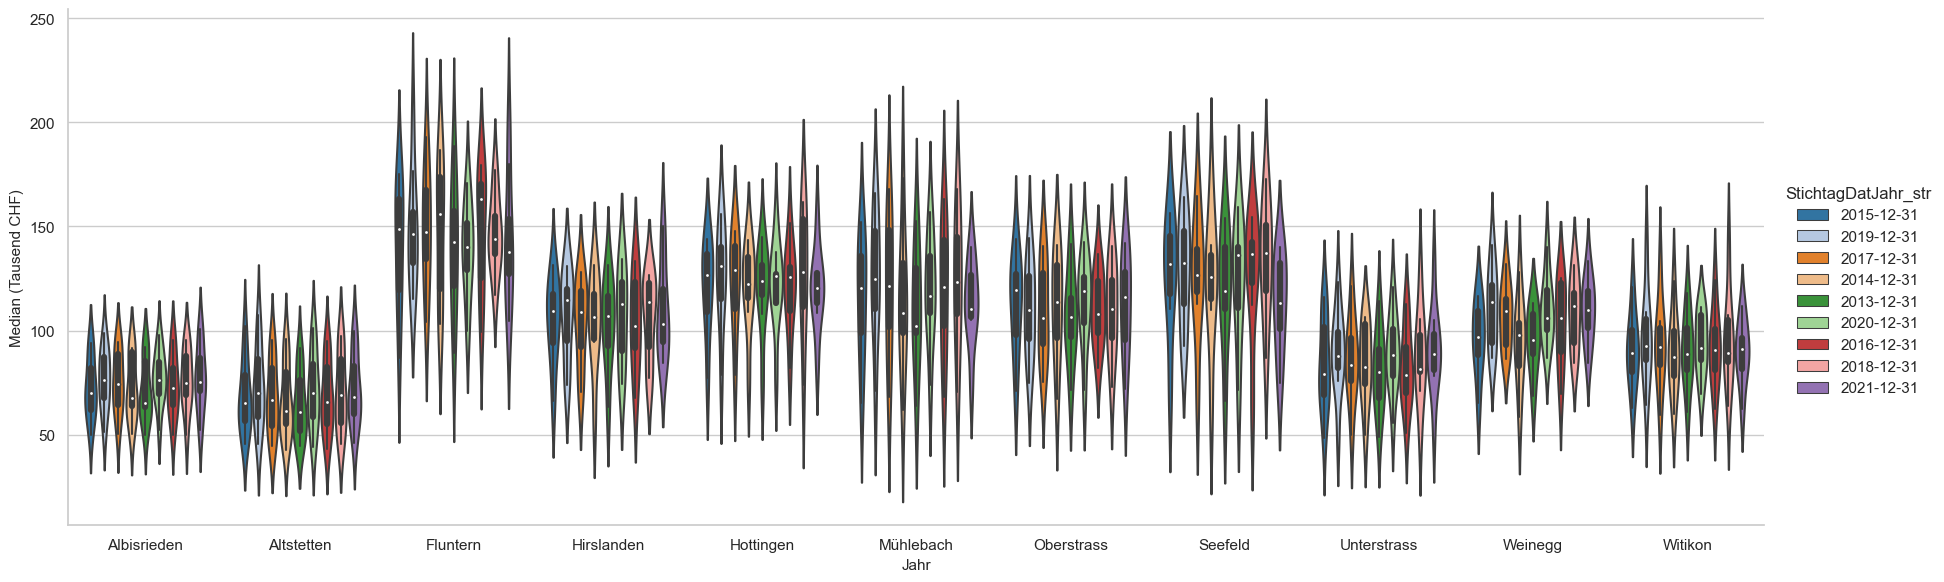

In [ ]:
#sns.color_palette("flare", as_cmap=True)
myHist = sns.catplot(x="RAUM_LANG"
            , y="HAE_GGH1400_STK1075"
            , hue="StichtagDatJahr_str"
            , kind="violin" #boxen, violin, --> wenn die aggregation nicht genau den werten in der grafik entspricht
            , palette="tab20" #, color="green" 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r',
            , height=6
            , aspect=3
            , edgecolor= None
            , order=None , legend_out=True
            ,data=data2betested[['StichtagDatJahr_str','RAUM_LANG', 'RAUM_CODE','HTY_LANG','HAE_GGH1400_STK1075', 'RAUM_my_sort']]
                     .query('RAUM_my_sort > 60 & RAUM_my_sort < 100').loc[data_min_date:data_max_date]
                     .reset_index().sort_values('RAUM_LANG', ascending = True)
           )
myHist.set_xlabels('Jahr', fontsize=11) # not set_label
myHist.set_ylabels('Median (Tausend CHF)', fontsize=11)

myHist


In [ ]:
grafic_name = package_name+"_bar_hhaek_zeit"+date_today+".png"

print('grafiken_testing/'+grafic_name)


myHist.savefig('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/wir100od100a_bar_hhaek_zeit_2024-06-19.png


#### Faced Grids

In [ ]:
myFG =data2betested[['StichtagDatJahr_str','RAUM_LANG', 'RAUM_CODE','HTY_LANG','HAE_GGH1400_STK1075', 'RAUM_my_sort']]\
                     .query('HAE_GGH1400_STK1075>10').loc[data_min_date:data_max_date]\
                     .reset_index().sort_values('RAUM_my_sort', ascending = True)

myFG

,StichtagDatJahr,StichtagDatJahr_str,RAUM_LANG,RAUM_CODE,HTY_LANG,HAE_GGH1400_STK1075,RAUM_my_sort
165,2013-12-31,2013-12-31,Rathaus,R00011,Ein-Elternhaushalt,68,11
2208,2021-12-31,2021-12-31,Rathaus,R00011,Ehepaar mit Kind(ern),99,11
2194,2021-12-31,2021-12-31,Rathaus,R00011,Ehepaar ohne Kinder,114,11
729,2015-12-31,2015-12-31,Rathaus,R00011,Ein-Elternhaushalt,53,11
1532,2018-12-31,2018-12-31,Rathaus,R00011,Ein-Elternhaushalt,70,11
...,...,...,...,...,...,...,...
1141,2017-12-31,2017-12-31,Hirzenbach,R00123,Ein-Elternhaushalt,39,123
1800,2019-12-31,2019-12-31,Hirzenbach,R00123,Wohngemeinschaft mit Kind(ern),56,123
1746,2019-12-31,2019-12-31,Hirzenbach,R00123,Einpersonenhaushalt,56,123
735,2015-12-31,2015-12-31,Hirzenbach,R00123,Wohngemeinschaft ohne Kinder,66,123


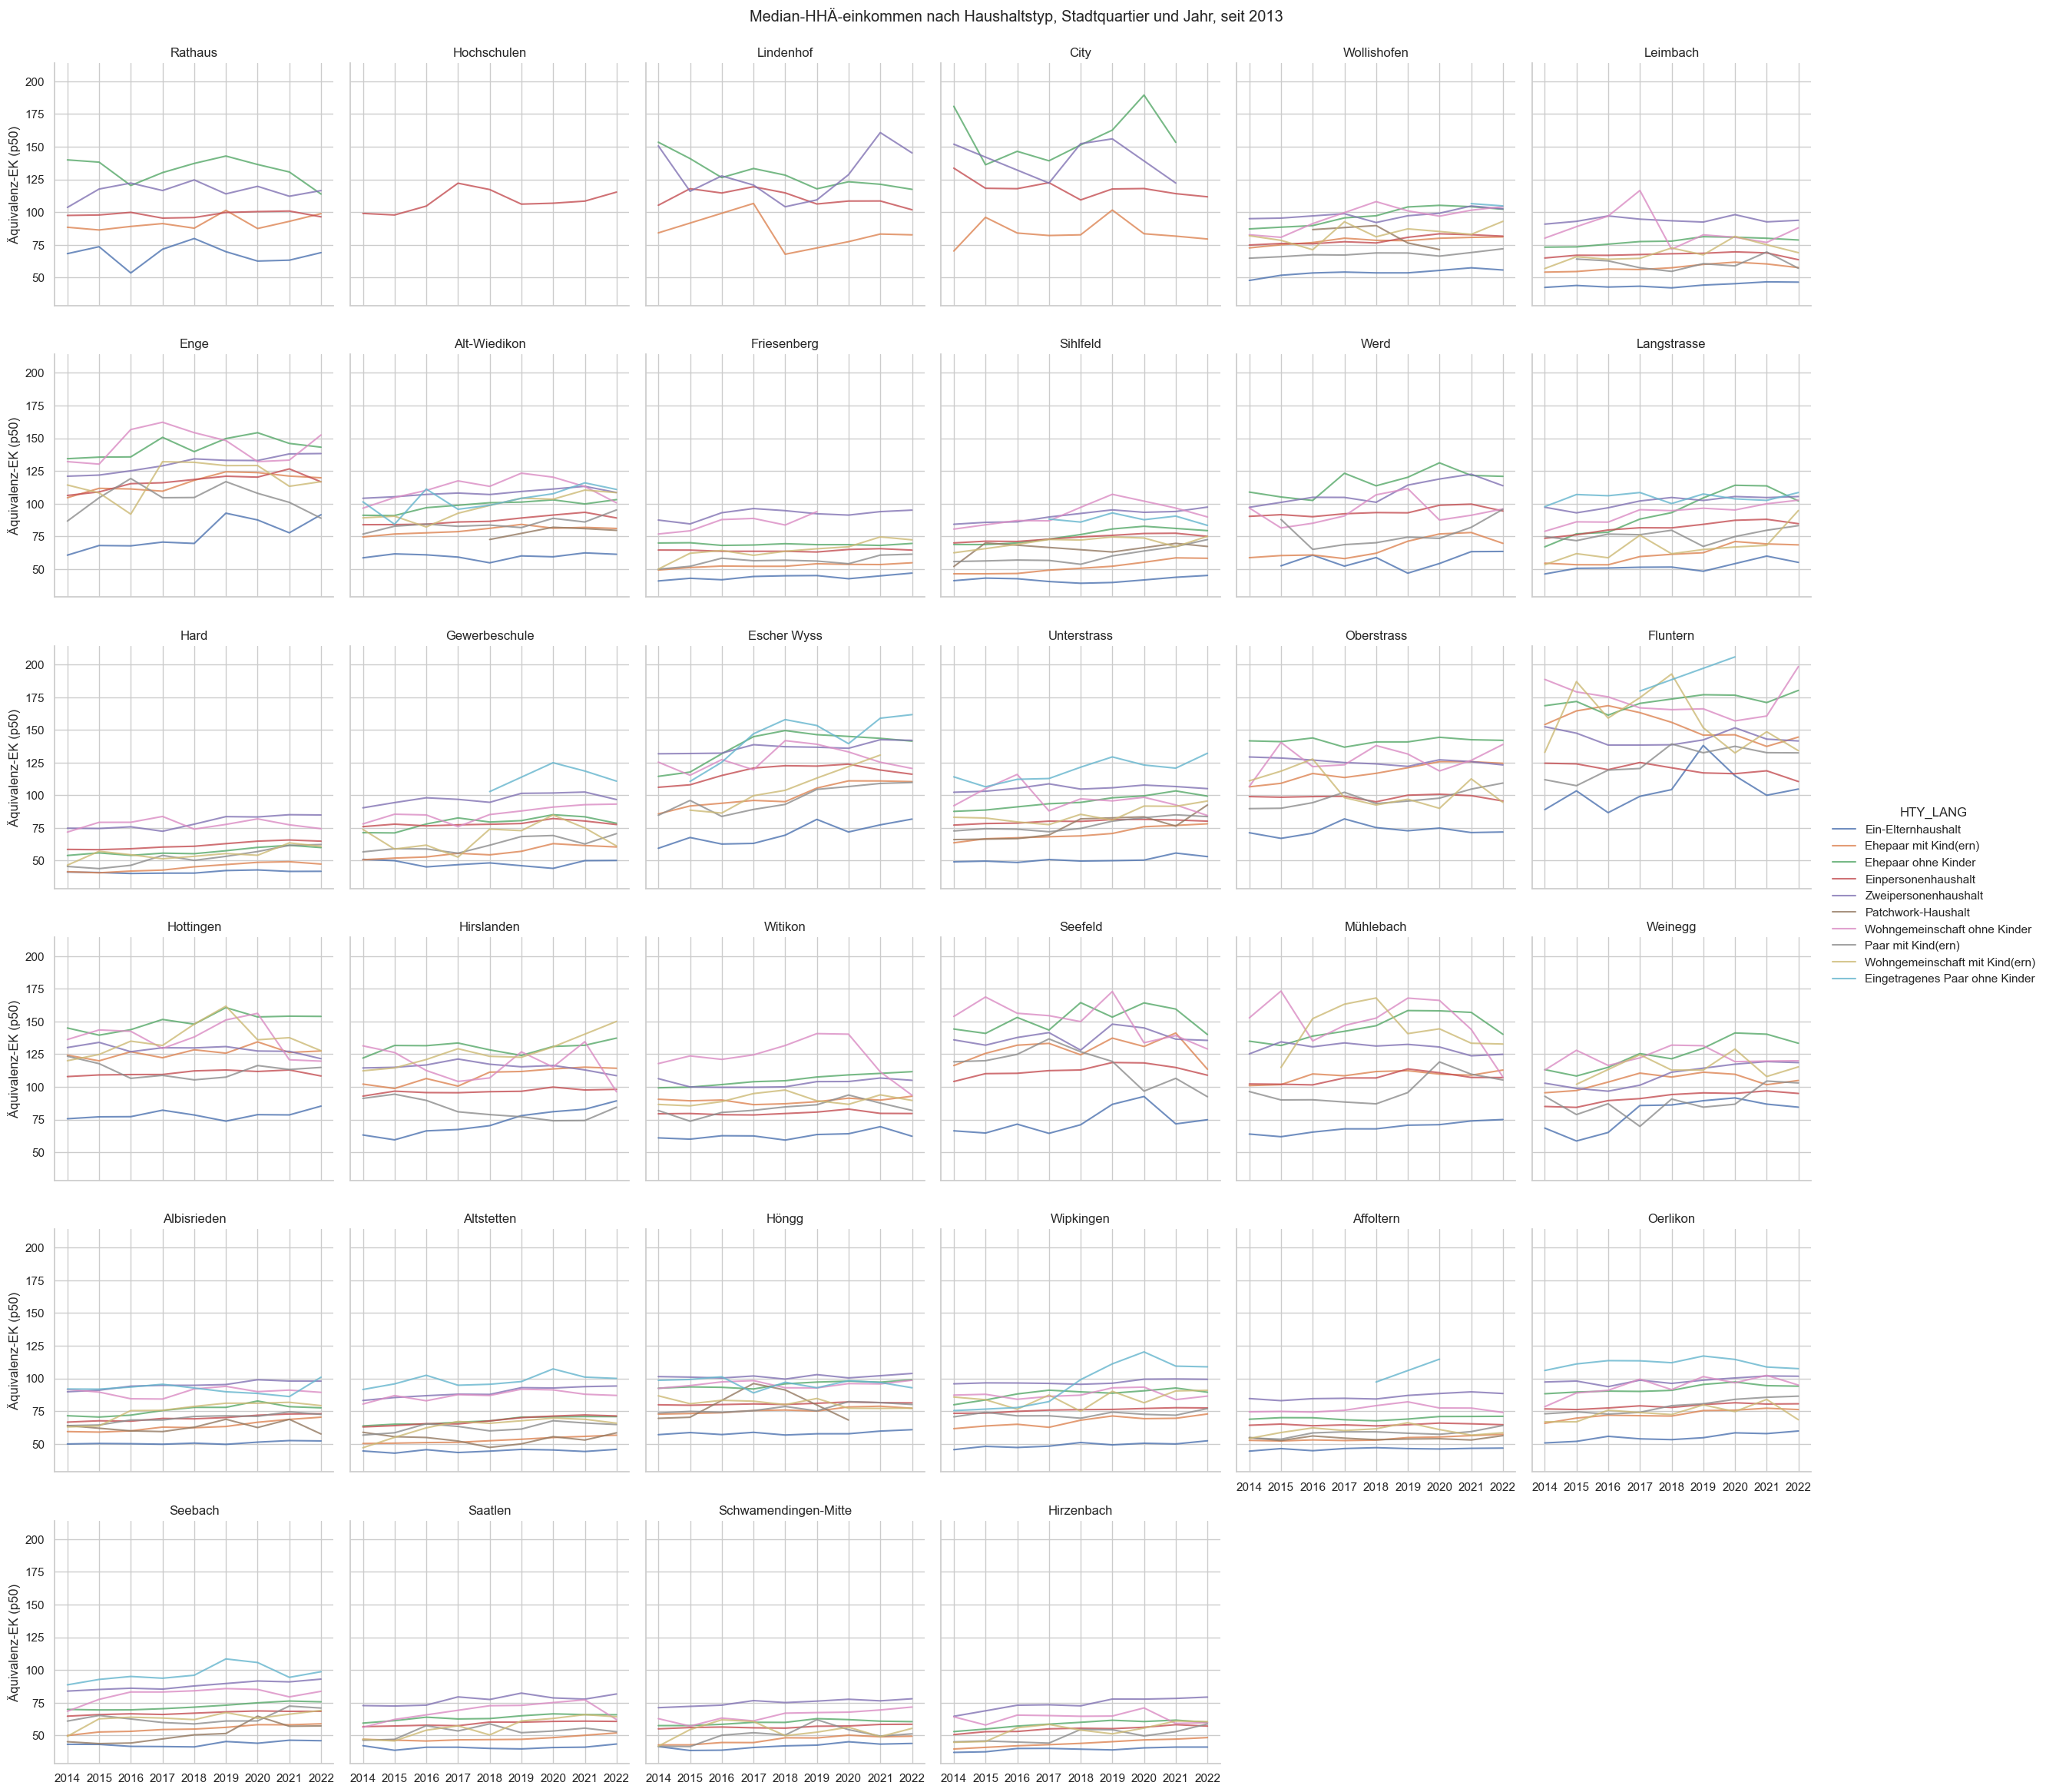

In [ ]:
faced_grid1 = mypy_dv.plot_sns_facetgrid(
    data = myFG.reset_index()
    , col = "RAUM_LANG"
    , hue = "HTY_LANG"
    , col_wrap = 6
    , height = 3
    , grafiktyp = sns.lineplot
    , x = "StichtagDatJahr"
    , y = "HAE_GGH1400_STK1075"
    , ylabel= "Äquivalenz-EK (p50)"
    , myTitle="Median-HHÄ-einkommen nach Haushaltstyp, Stadtquartier und Jahr, seit "+str(data2betested.index.year.min())
    )

In [ ]:
grafic_name = package_name+"_fg_raum_hhtyp_zeit_hhaeq_p50"+date_today+".png"

print('grafiken_testing/'+grafic_name)


faced_grid1.savefig('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/wir100od100a_fg_raum_hhtyp_zeit_hhaeq_p50_2024-06-19.png


#### Treemaps

In [ ]:
data2betested.columns

Index(['ZEIT_LANG', 'ZEIT_CODE', 'RAUM_LANG', 'RAUM_CODE', 'HTY_LANG', 'HTY_CODE',
       'HAE_GGH1400_STK1025', 'HAE_GGH1400_STK1050', 'HAE_GGH1400_STK1075', 'StichtagDatJahr_str',
       'Jahr', 'RAUM_my_sort'],
      dtype='object')

In [ ]:
myTM =data2betested.loc[data_max_date]\
    .groupby(['ZEIT_LANG', 'ZEIT_CODE', 'Jahr','RAUM_LANG', 'RAUM_CODE', 'HTY_LANG', 'HTY_CODE','HAE_GGH1400_STK1075']) \
    .agg(med_HAE75=('HAE_GGH1400_STK1075', 'mean')) \
    .sort_values('Jahr', ascending=True) 

myTM.reset_index().head(2)

,ZEIT_LANG,ZEIT_CODE,Jahr,RAUM_LANG,RAUM_CODE,HTY_LANG,HTY_CODE,HAE_GGH1400_STK1075,med_HAE75
0,2021-12-31,Z31122021,2021,Affoltern,R00111,Ehepaar mit Kind(ern),HTY0008,57,57
1,2021-12-31,Z31122021,2021,Rathaus,R00011,Ehepaar mit Kind(ern),HTY0008,99,99


In [ ]:
treeMap1 = mypy_dv.plot_px_treemap(
    data=myTM.reset_index()
    ,levels=["RAUM_LANG", "HTY_LANG"]
    ,values="med_HAE75"
    ,color="HTY_LANG"
    ,myHeaderTitle="Median-HHÄ-einkommen nach Stadtquartier und Haushaltstyp, "+data_max_date
    ,color_discrete_map={'(?)':'lightgrey', 'Wohnen':'lightblue'}                
    #,margin_val_bottom=25
)
treeMap1


path: [<plotly.express._special_inputs.Constant object at 0x000001B45892A350>, 'RAUM_LANG', 'HTY_LANG']
Typ von path: <class 'list'>


In [ ]:
grafic_name = package_name+"_tm_quartier_hhtyp_medhhaeqek"+date_today+".png"
print(grafic_name)

treeMap1.write_image('grafiken_testing/'+grafic_name)

wir100od100a_tm_quartier_hhtyp_medhhaeqek_2024-06-19.png


AttributeError: 'NoneType' object has no attribute 'write_image'

In [ ]:
treeMap2 = mypy_dv.plot_px_treemap(
    data=myTM.reset_index()
    ,levels=["HTY_LANG", "RAUM_LANG"]
    ,values="med_HAE75"
    ,color="HTY_LANG"
    ,myHeaderTitle="Median-HHÄ-einkommen nach Stadtquartier und Haushaltstyp, "+data_max_date
    ,color_discrete_map={'(?)':'lightgrey', 'Wohnen':'lightblue'}                
    #,margin_val_bottom=25
)
treeMap2

path: [<plotly.express._special_inputs.Constant object at 0x00000199BC154BD0>, 'HTY_LANG', 'RAUM_LANG']
Typ von path: <class 'list'>


In [ ]:
grafic_name = package_name+"_tm_hhtyp_quartier_medhhaeqek"+date_today+".png"
print(grafic_name)

treeMap2.write_image('grafiken_testing/'+grafic_name)

wir100od100a_tm_hhtyp_quartier_medhhaeqek_2024-05-27.png


AttributeError: 'NoneType' object has no attribute 'write_image'

## ---------------------- hier Plausi beendet

Übersicht zu LOSD-Jobs:
[Sharepoint](https://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/DispForm.aspx?ID=875&Source=https%3A%2F%2Fkollaboration%2Eintranet%2Estzh%2Ech%2Forga%2Fssz%2Dprodukte%2FLists%2FSASA%5FOutputs%2FOGD%2520Metadaten%2Easpx%23InplviewHasheb69a2c0%2Ded94%2D4ef2%2D91a5%2D3b19f038e442%3DFilterField1%253DMetadaten%25255Fx002d%25255FPublikations%25255Fx00%2DFilterValue1%253DINT&ContentTypeId=0x0100988EAF029F1EFE4CA675F53C32A5D53D01006DBC563E6FBE9E4EB6FDC780799752E1)